In [44]:
import pandas as pd
df = pd.read_csv(r'D:\University\Biomedical Signal Processing\Project\merged_data.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_14256\2777360388.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\University\Biomedical Signal Processing\Project\merged_data.csv')


In [45]:
df['id'].unique()

array([15, '15', '5C', '6B', '6D', '7A', '7E', '83', 83, '8B', '94', 94,
       'BG', 'CE', 'DF', 'E4', 'EG', 'F5'], dtype=object)

In [46]:
df.isnull().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

In [47]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [48]:
df['dt'] = df['datetime'].diff().dt.total_seconds()

# Print the most common time difference
print(df['dt'].mode()[0])
dt = df['dt'].mode()[0]   # most common time gap
sampling_rate = 1 / dt
print("Sampling rate:", sampling_rate, "Hz")

0.03124992
Sampling rate: 32.000081920209716 Hz


In [49]:
max(df["datetime"].dt.hour)

23

In [50]:
dfworking_df = df[(df["datetime"].dt.hour >= 8) & (df["datetime"].dt.hour < 23)]

In [51]:
dfworking_df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label,dt
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0,NaN
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0,0.03125
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0,0.03125
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0,0.03125
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0,0.03125
...,...,...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.875000064,2.0,0.03125
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.906249984,2.0,0.03125
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.937499904,2.0,0.03125
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.968750080,2.0,0.03125


In [52]:
dfworking_df.drop('dt', axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14256\4015059855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfworking_df.drop('dt', axis=1, inplace=True)


In [53]:
dfworking_df.isnull().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

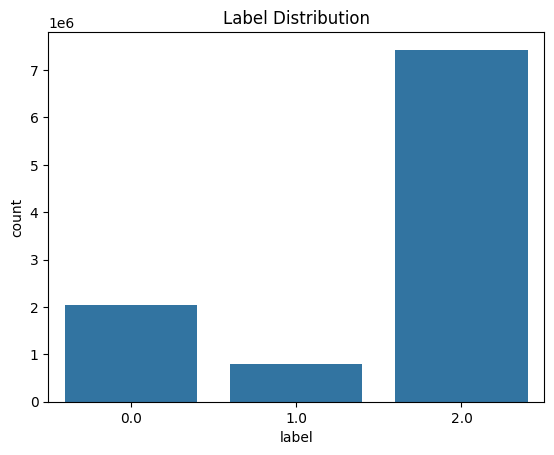

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dfworking_df, x='label')

plt.title("Label Distribution")
plt.show()


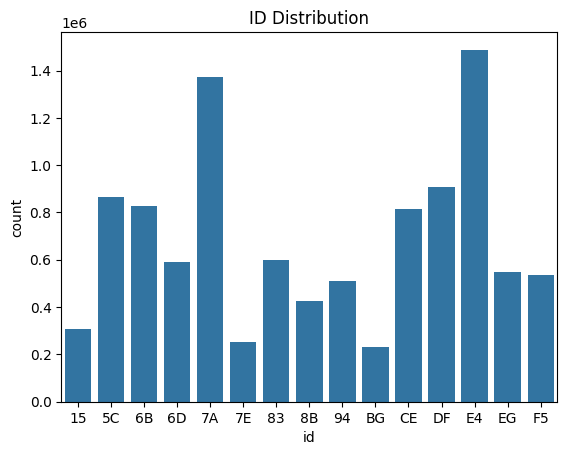

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dfworking_df, x='id')

plt.title("ID Distribution")
plt.show()


In [23]:
!pip install imbalanced-learn


In [54]:
ids=dfworking_df['id'].unique()
id_dict ={}
for i in range(len(ids)):
    id_dict[ids[i]] = i
id_dict

dfworking_df['id'] = dfworking_df['id'].map(id_dict)

C:\Users\HP\AppData\Local\Temp\ipykernel_14256\3267515782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfworking_df['id'] = dfworking_df['id'].map(id_dict)


In [55]:
dfworking_df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,0,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,0,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,0,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,0,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,0,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,16,2020-07-23 17:28:59.875000064,2.0
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,16,2020-07-23 17:28:59.906249984,2.0
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,16,2020-07-23 17:28:59.937499904,2.0
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,16,2020-07-23 17:28:59.968750080,2.0


In [70]:
import pandas as pd

X = dfworking_df.drop(columns=['datetime','dt'], errors='ignore') 
y = dfworking_df['label']
from imblearn.over_sampling import SMOTE

count_labels = y.value_counts()
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_res, y_res = smote.fit_resample(X, y)
print(x_res.shape, y_res.shape)

(22292412, 8) (22292412,)


In [71]:
dfworking_df_resampled = pd.DataFrame(x_res, columns=X.columns)  # features
dfworking_df_resampled['label'] = y_res  # attach labels

print(dfworking_df_resampled.head())

      X     Y     Z       EDA     HR   TEMP  id  label
0 -13.0 -61.0   5.0  6.769995  99.43  31.17   0    2.0
1 -20.0 -69.0  -3.0  6.769995  99.43  31.17   0    2.0
2 -31.0 -78.0 -15.0  6.769995  99.43  31.17   0    2.0
3 -47.0 -65.0 -38.0  6.769995  99.43  31.17   0    2.0
4 -67.0 -57.0 -53.0  6.769995  99.43  31.17   0    2.0


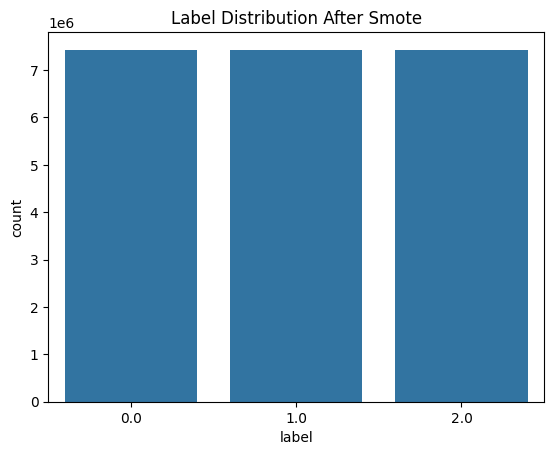

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dfworking_df_resampled, x='label')

plt.title("Label Distribution After Smote")
plt.show()


In [12]:
dfworking_df.columns

Index(['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'id', 'datetime', 'label', 'dt'], dtype='object')

## Normalization

In [80]:
from sklearn.preprocessing import StandardScaler

cols = ['X','Y','Z','EDA','HR','TEMP']
scaler = StandardScaler()
dfworking_df_resampled[cols] = scaler.fit_transform(dfworking_df_resampled[cols])

In [82]:
dfworking_df_resampled

,X,Y,Z,EDA,HR,TEMP,id,label
0,0.470238,-1.792974,-0.633230,0.663497,0.935007,-0.314207,0,2.0
1,0.241444,-2.027711,-0.875664,0.663497,0.935007,-0.314207,0,2.0
2,-0.118089,-2.291791,-1.239315,0.663497,0.935007,-0.314207,0,2.0
3,-0.641047,-1.910342,-1.936312,0.663497,0.935007,-0.314207,0,2.0
4,-1.294744,-1.675605,-2.390875,0.663497,0.935007,-0.314207,0,2.0
...,...,...,...,...,...,...,...,...
22292407,-0.968765,0.142830,-1.420333,-0.562222,0.832334,0.321323,5,1.0
22292408,0.633663,1.669405,0.063767,-0.494447,-1.810113,-1.343003,2,1.0
22292409,0.012650,-0.237837,0.912286,-0.543870,-1.132710,-0.200866,12,1.0
22292410,0.078020,0.084927,0.972894,-0.542710,-0.061257,-1.665592,2,1.0


## Feature Engineering

In [83]:
import numpy as np
from scipy.signal import find_peaks
import pywt
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [84]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

def extract_time_features(signal):
    return {
        'mean': np.mean(signal),
        'std': np.std(signal),
        'var': np.var(signal),
        'min': np.min(signal),
        'max': np.max(signal),
        'range': np.max(signal) - np.min(signal),
        'median': np.median(signal),
        'skewness': skew(signal),
        'kurtosis': kurtosis(signal),
        'rms': np.sqrt(np.mean(signal**2)),
        'energy': np.sum(signal**2),
        'zero_crossings': ((signal[:-1] * signal[1:]) < 0).sum()
    }

def extract_freq_features(signal, dt=1.0):
    fft_vals = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), d=dt)
    fft_power = np.abs(fft_vals)**2
    return {
        'spectral_energy': np.sum(fft_power),
        'dominant_freq': fft_freq[np.argmax(fft_power)],
        'mean_freq': np.sum(fft_freq * fft_power) / np.sum(fft_power),
    }


def extract_features_per_window(df, cols, window_size, step_size):
    """Extract features per window for all signals."""
    features_list = []
    
    for start in range(0, len(df) - window_size + 1, step_size):
        end = start + window_size
        window = df.iloc[start:end]

        feature_dict = {}
        
        for col in cols:
            signal = window[col].values

            tfeat = extract_time_features(signal)
            ffeat = extract_freq_features(signal)

            # prefix with the column name
            tfeat = {f"{col}_{k}": v for k, v in tfeat.items()}
            ffeat = {f"{col}_{k}": v for k, v in ffeat.items()}

            feature_dict.update(tfeat)
            feature_dict.update(ffeat)
        
        # add label of the window → majority vote
        if "label" in df.columns:
            feature_dict["label"] = window["label"].mode()[0]
            feature_dict["id"] = window["id"].mode()[0]

        features_list.append(feature_dict)

    return pd.DataFrame(features_list)


In [85]:
grouped = dfworking_df_resampled.groupby('id')
print(grouped.groups.keys())  # prints all unique nurse IDs


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])


In [86]:
final_features = []
cols = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']

window_size = 960    # 30s window
step_size = 480      # 50% overlap

for pid, df_person in dfworking_df_resampled.groupby('id'):
    df_person = df_person.reset_index(drop=True)
    person_features_df = extract_features_per_window(df_person, cols, window_size, step_size)
    person_features_df['id'] = pid
    final_features.append(person_features_df)   

features_df = pd.concat(final_features, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14256\1205751374.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': skew(signal),
C:\Users\HP\AppData\Local\Temp\ipykernel_14256\1205751374.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': kurtosis(signal),
C:\Users\HP\AppData\Local\Temp\ipykernel_14256\1205751374.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': skew(signal),
C:\Users\HP\AppData\Local\Temp\ipykernel_14256\1205751374.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identi

In [92]:
features_df

,X_mean,X_std,X_var,X_min,X_max,X_range,X_median,X_skewness,X_kurtosis,X_rms,...,TEMP_skewness,TEMP_kurtosis,TEMP_rms,TEMP_energy,TEMP_zero_crossings,TEMP_spectral_energy,TEMP_dominant_freq,TEMP_mean_freq,label,id
0,0.053472,0.582145,0.338893,-2.406029,1.973742,4.379770,0.241444,-1.059293,1.043252,0.584596,...,0.122822,-0.566413,0.252355,61.135786,0,5.869035e+04,0.0,0.000000e+00,2,0
1,0.246347,0.211076,0.044553,-0.346883,0.862457,1.209340,0.176075,0.905268,0.313597,0.324407,...,-0.589208,-1.238926,0.198088,37.669134,0,3.616237e+04,0.0,0.000000e+00,2,0
2,0.393055,0.239533,0.057376,-0.150774,0.862457,1.013230,0.502923,-0.081125,-1.534777,0.460291,...,0.715465,-0.201071,0.162113,25.229431,0,2.422025e+04,0.0,2.291931e-21,2,0
3,0.677345,0.153002,0.023409,0.372184,1.320045,0.947861,0.666348,0.380863,-0.602682,0.694410,...,0.155200,-1.021396,0.135832,17.712290,0,1.700380e+04,0.0,1.305853e-20,2,0
4,0.046663,0.904408,0.817954,-2.765562,1.973742,4.739304,0.568293,-0.374780,-1.617142,0.905611,...,0.231743,-0.747840,0.111748,11.988070,0,1.150855e+04,0.0,9.646943e-21,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46413,1.385492,0.999561,0.999123,-1.237154,3.830055,5.067210,1.330285,0.024985,-0.838508,1.708423,...,-0.656033,-0.515774,1.308184,1642.892753,0,1.577177e+06,0.0,-2.029256e-06,0,16
46414,1.367892,1.002913,1.005835,-1.237154,3.818170,5.055324,1.318973,0.030236,-0.862292,1.696161,...,-0.628521,-0.555429,1.307453,1641.056133,0,1.575414e+06,0.0,-3.950249e-06,0,16
46415,1.331091,1.003682,1.007377,-1.233652,3.818170,5.051822,1.287360,0.068042,-0.911367,1.667087,...,-0.574172,-0.649125,1.309724,1646.761074,0,1.580891e+06,0.0,-1.524559e-05,0,16
46416,1.279967,0.974726,0.950091,-1.233652,3.807674,5.041325,1.281509,0.056534,-0.761701,1.608853,...,-0.616813,-0.544765,1.312977,1654.951849,0,1.588754e+06,0.0,-1.510753e-05,0,16


In [93]:
features_df.to_csv(r'D:\University\Biomedical Signal Processing\Project\features_data.csv', index=False)

In [94]:
features_df['label']=features_df['label'].astype(int)

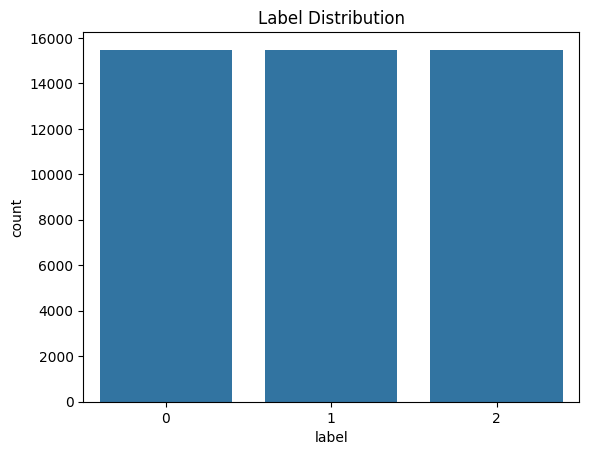

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=features_df, x='label')

plt.title("Label Distribution")
plt.show()


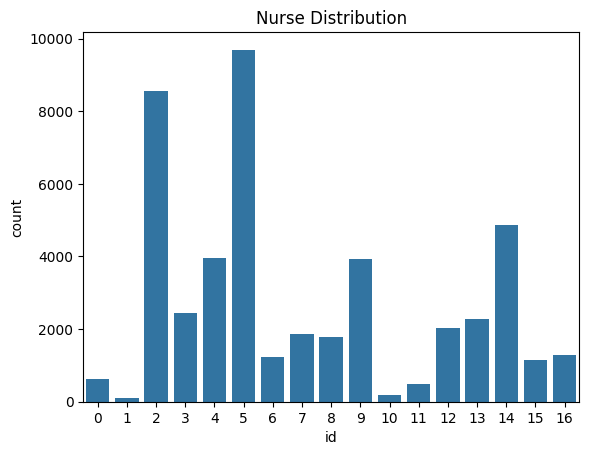

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=features_df, x='id')

plt.title("Nurse Distribution")
plt.show()
